In [34]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv('/Users/miaborko/Documents/epic3/Block3Epic/cleaned_data.csv')
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Differentiate,Grade,A Stage,Tumor Size (mm),Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months
0,68,White,Married,T1,N1,IIA,Poorly differentiated,Grade 3,Regional,4,Positive,Positive,24,1,60
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,Grade 2,Regional,35,Positive,Positive,14,5,62
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,Grade 2,Regional,63,Positive,Positive,14,7,75
3,58,White,Married,T1,N1,IIA,Poorly differentiated,Grade 3,Regional,18,Positive,Positive,2,1,84
4,47,White,Married,T2,N1,IIB,Poorly differentiated,Grade 3,Regional,41,Positive,Positive,3,1,50


In [36]:
#
df = pd.read_csv('/Users/miaborko/Documents/epic3/Block3Epic/cleaned_data.csv')

df.rename({'Tumor Size': 'Tumor Size (mm)', 'T Stage ': 'T Stage', 'Reginol Node Positive': 'Regional Node Positive', 'differentiate': 'Differentiate'}, axis=1, inplace=True)
df['Grade'] = df['Grade'].map({'1': 'Grade 1', '2': 'Grade 2', '3': 'Grade 3', ' anaplastic; Grade IV': 'Grade 4'})

df.to_csv('/Users/miaborko/Documents/epic3/Block3Epic/cleaned_data.csv', index=False)

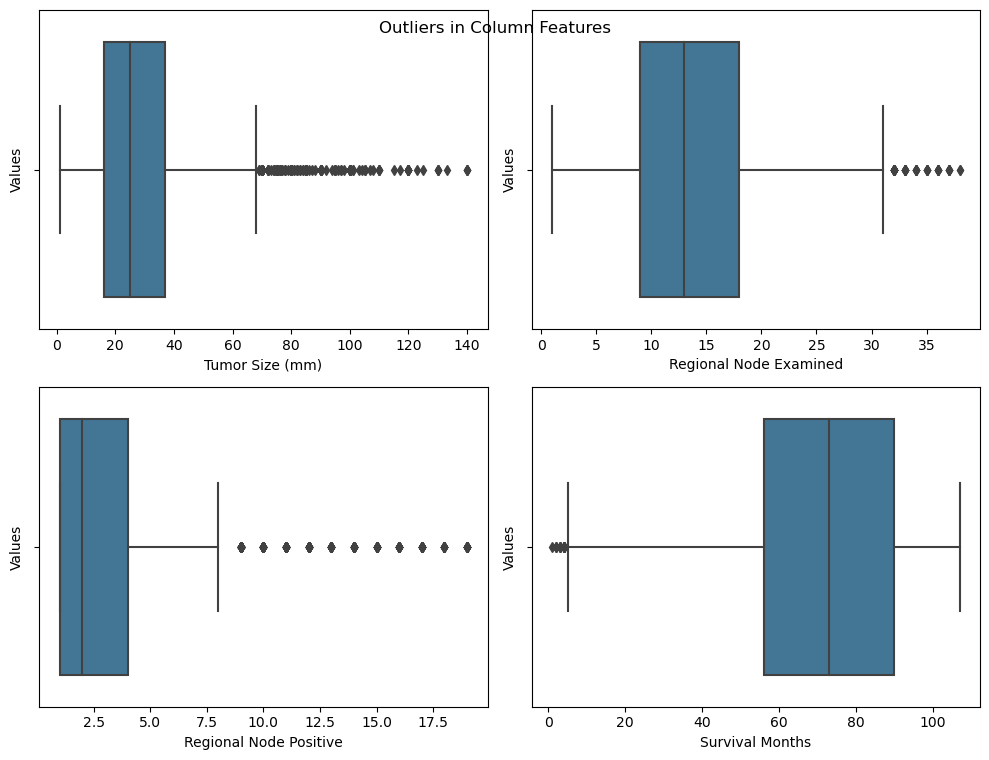

In [37]:
#Searching for outliers using mustage box amigo (remind me to delete these comments at some point)
#I don't think I'll use this one but we will see
import seaborn as sns
num_cols = ['Tumor Size (mm)', 'Regional Node Examined', 'Regional Node Positive', 'Survival Months']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), dpi=100)
fig.suptitle('Outliers in Column Features', y=0.93)

for col, ax in zip(num_cols, axes.ravel()):
    sns.boxplot(data=df, x=col, palette='mako_r', ax=ax) 
    ax.set_ylabel('Values')

plt.tight_layout()
plt.show()

In [38]:
#explanation:
#end nodes |-- and --| are min and max values, where the box starts is in between Q1 and Q3 (50% in the middle, 25% on each side ouside the box)
#line going through the box = median

In [39]:
#serching for outliers 
from collections import Counter


outlier_cols = ['Tumor Size (mm)', 'Regional Node Examined', 'Regional Node Positive']

outlier_index = []
outlier_list=[]

for col in outlier_cols:
    
    Q1 = np.percentile(df[col], 25, interpolation='midpoint')
    Q3 = np.percentile(df[col], 75, interpolation='midpoint')
    
    IQR = Q3 - Q1
    
    upper_bound = Q3 + (1.5 * IQR)
    lower_bound = Q1 - (1.5 * IQR)
    
    upper_outliers = df[col] >= upper_bound
    lower_outliers = df[col] <= lower_bound
    
    outliers = df[upper_outliers | lower_outliers].index
    
    outlier_index.extend(outliers)
    

outlier_index = Counter(outlier_index)

for key in outlier_index.keys():
    outlier_list.append(key)

print( f'Number of outliers: {len(outlier_list)}' )

Number of outliers: 681


/var/folders/_c/s1yyycpn5s50m8qmlf_cz70h0000gn/T/ipykernel_2313/391981818.py:12: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df[col], 25, interpolation='midpoint')
/var/folders/_c/s1yyycpn5s50m8qmlf_cz70h0000gn/T/ipykernel_2313/391981818.py:13: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df[col], 75, interpolation='midpoint')


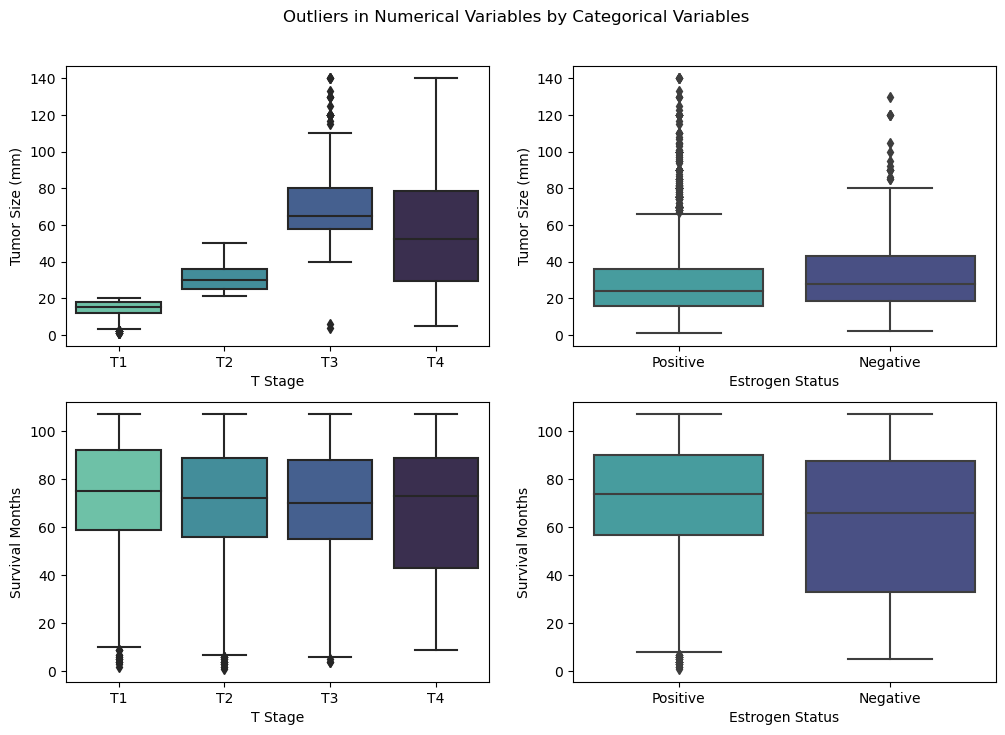

In [40]:
#different approach
num_cols = ['Tumor Size (mm)', 'Survival Months']
cat_cols = ['T Stage', 'Estrogen Status']
fig, axes = plt.subplots(nrows=len(num_cols), ncols=len(cat_cols), figsize=(12, 8))
fig.suptitle('Outliers in Numerical Variables by Categorical Variables', y=0.95)

for i, num_col in enumerate(num_cols):
    for j, cat_col in enumerate(cat_cols):
        sns.boxplot(data=df, x=cat_col, y=num_col, ax=axes[i, j], palette='mako_r')
        axes[i, j].set_ylabel(num_col)
        axes[i, j].set_xlabel(cat_col)
    


In [41]:

from collections import Counter
num_cols = ['Tumor Size (mm)', 'Survival Months']
cat_cols = ['T Stage', 'Estrogen Status']

outlier_index = []
outlier_ind_list = []

for num_col in num_cols:
    for cat_col in cat_cols:
        unique_categories = df[cat_col].unique()
        for category in unique_categories:
            # Get the data subset for the current category
            data_subset = df[df[cat_col] == category][num_col]
            
            # Check if the data subset is not empty
            if not data_subset.empty:
                # Calculate quartiles and interquartile range
                Q1 = np.percentile(data_subset, 25, interpolation='midpoint')
                Q3 = np.percentile(data_subset, 75, interpolation='midpoint')
                IQR = Q3 - Q1

                upper_bound = Q3 + (1.5 * IQR)
                lower_bound = Q1 - (1.5 * IQR)

                upper_outliers = data_subset >= upper_bound
                lower_outliers = data_subset <= lower_bound

                outliers = data_subset[upper_outliers | lower_outliers].index

                outlier_index.extend(outliers)

outlier_index = Counter(outlier_index)

# Store only unique outlier indices
for key in outlier_index.keys():
    outlier_ind_list.append(key)

print(f'Number of outliers: {len(outlier_ind_list)}')


/var/folders/_c/s1yyycpn5s50m8qmlf_cz70h0000gn/T/ipykernel_2313/3337567114.py:18: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data_subset, 25, interpolation='midpoint')


Number of outliers: 334


/var/folders/_c/s1yyycpn5s50m8qmlf_cz70h0000gn/T/ipykernel_2313/3337567114.py:19: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(data_subset, 75, interpolation='midpoint')


In [42]:
#df_clean = df.drop(outlier_ind_list)

#depends on the model

In [43]:
#dropping columns
#df.drop(columns=["Marital Status", "Differentiate"], inplace=True)
df.head()


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Differentiate,Grade,A Stage,Tumor Size (mm),Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months
0,68,White,Married,T1,N1,IIA,Poorly differentiated,NaN,Regional,4,Positive,Positive,24,1,60
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,NaN,Regional,35,Positive,Positive,14,5,62
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,NaN,Regional,63,Positive,Positive,14,7,75
3,58,White,Married,T1,N1,IIA,Poorly differentiated,NaN,Regional,18,Positive,Positive,2,1,84
4,47,White,Married,T2,N1,IIB,Poorly differentiated,NaN,Regional,41,Positive,Positive,3,1,50


In [44]:
#to see correlation between data, jeans code btw
correlations = df.corr()
correlations

/var/folders/_c/s1yyycpn5s50m8qmlf_cz70h0000gn/T/ipykernel_2313/3724643784.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


,Age,Tumor Size (mm),Regional Node Examined,Regional Node Positive,Survival Months
Age,1.000000,-0.073608,-0.046628,-0.001016,-0.006364
Tumor Size (mm),-0.073608,1.000000,0.091660,0.283459,-0.076645
Regional Node Examined,-0.046628,0.091660,1.000000,0.298609,0.001278
Regional Node Positive,-0.001016,0.283459,0.298609,1.000000,-0.116978
Survival Months,-0.006364,-0.076645,0.001278,-0.116978,1.000000
